In [1]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
print("Seaborn version", sns.__version__)

Seaborn version 0.9.0


In [0]:
seed = 1

In [0]:
from sklearn.datasets import fetch_california_housing

In [0]:
data = fetch_california_housing()

In [6]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [7]:
import pandas as pd
frame = pd.DataFrame(data.data, columns=data.feature_names)
frame['target'] = data.target
frame.describe(include='all')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [0]:
samples = frame.sample(len(frame) // 10, random_state=seed)

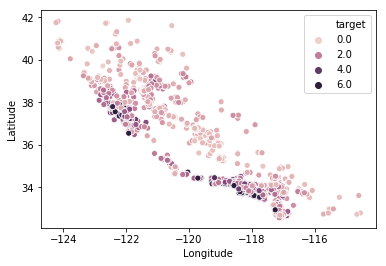

In [9]:
fig = sns.scatterplot(x="Longitude", y="Latitude", hue="target", data=samples);

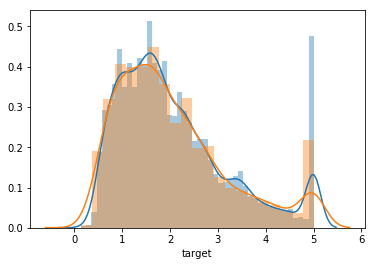

In [10]:
sns.distplot(frame.target);
sns.distplot(samples.target);

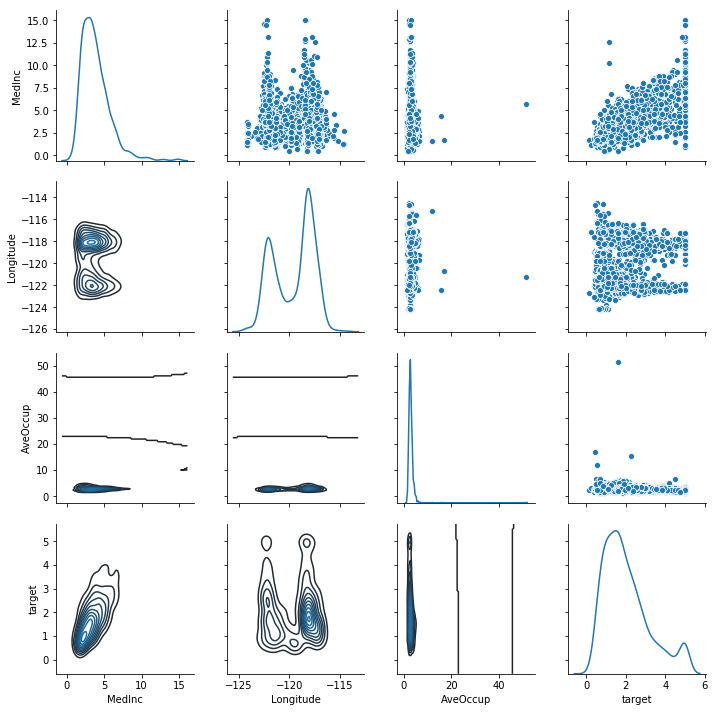

In [11]:
features = ['MedInc', 'Longitude', 'AveOccup', 'target']

graph = sns.PairGrid(samples[features], diag_sharey=False);
graph.map_lower(sns.kdeplot);
graph.map_upper(sns.scatterplot);
graph.map_diag(sns.kdeplot);

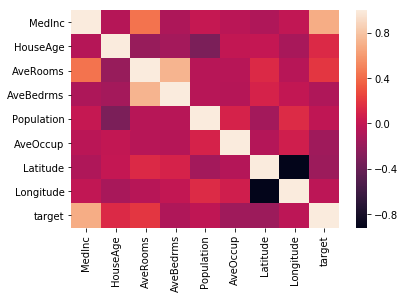

In [12]:
sns.heatmap(samples.corr());

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

features = list(data.feature_names)
components = ['MedInc', 'AveRooms', 'Population', 'Latitude']

print("%.4f" % cross_val_score(LinearRegression(), samples[components], samples.target, cv=5).mean())
print("%.4f" % cross_val_score(LinearRegression(), samples[features], samples.target, cv=5).mean())

0.4877
0.5675


In [14]:
features.remove('Longitude')
features.remove('Latitude')

left = samples[samples.Longitude < -121]
right = samples[samples.Longitude >= -121]

print("%.4f" % cross_val_score(LinearRegression(), left[components], left.target, cv=5).mean())
print("%.4f" % cross_val_score(LinearRegression(), left[features], left.target, cv=5).mean())

print("%.4f" % cross_val_score(LinearRegression(), right[components], right.target, cv=5).mean())
print("%.4f" % cross_val_score(LinearRegression(), right[features], right.target, cv=5).mean())

0.5788
0.5107
0.4830
0.5288


In [15]:
from sklearn.linear_model import LinearRegression
print("%.4f" % cross_val_score(LinearRegression(), samples[['MedInc']], samples.target, cv=5).mean())

0.4668


In [16]:
changed = samples.copy()
changed['occup_binned'] = pd.qcut(changed.AveOccup, 10, labels=False)
changed = pd.get_dummies(changed, columns=['occup_binned'])
columns = list(changed.columns); columns.remove('AveOccup')
columns.remove('target')

print("LinReg %.4f" % cross_val_score(LinearRegression(), changed[columns], changed.target, cv=5).mean())

LinReg 0.6520


In [0]:
import xgboost

In [18]:
features = list(data.feature_names)
split = len(samples) * 3 // 4

regr = xgboost.XGBRegressor(random_state=seed)
regr.fit(samples[:split][features], samples[:split].target)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [19]:
regr.score(samples[split:][features], samples[split:].target)

0.7667501860381525

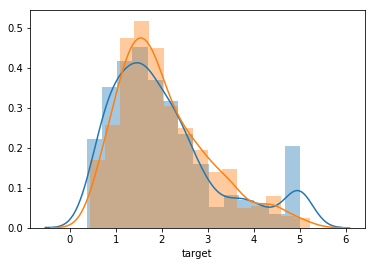

In [20]:
sns.distplot(samples[split:].target);
sns.distplot(regr.predict(samples[split:][features]));

In [21]:
print("XGBReg %.4f" % cross_val_score(xgboost.XGBRegressor(random_state=0), samples[features], samples.target, cv=5).mean())

XGBReg 0.7331
